In [3]:
import numpy as np
import pandas as pd
from numpy import mean, std
from matplotlib import pyplot

In [4]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [5]:
url = 'SICKLE CELL DISEASE DATASET.xlsx'
df = pd.read_excel(url)
df.head()

,S/N,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,...,Hb F,Temp,Mean corpuscular volume (MCV),Platelets (PLTS),Alanine Aminotransferase (ALT) test,Bilirubin,Lactate Dehydrogenase (LDH),Parameter total value,Percentage average,Pain Classification
0,1,0,39,15,36,97,3,3,67,118,...,12,38,68,318376,35,0.791609,311,319420.7916,79.559634,Vaso-occlusive Crisis\n
1,2,1,33,1,63,15,8,4,70,117,...,13,38,114,230872,16,0.642247,304,231967.6422,57.777268,Vaso-occlusive Crisis\n
2,3,0,30,7,29,10,7,3,16,124,...,14,39,79,234115,21,0.123453,353,235125.1235,58.563717,Vaso-occlusive Crisis\n
3,4,0,30,11,29,84,3,5,73,119,...,14,41,116,202259,42,0.422580,323,203316.4226,50.640974,Mild Pain
4,5,0,20,13,11,13,5,2,54,105,...,16,40,85,182085,38,0.945640,300,183007.9456,45.582647,Mild Pain


## Data analysis

In [6]:
df.drop(['S/N'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0    Gender (sex)                                     100 non-null    int64  
 1      Age of patient                                 100 non-null    int64  
 2     Age at diagnosis                                100 non-null    int64  
 3   Body Mass Index BMI                               100 non-null    int64  
 4   Packet Cell Volume (PCV)                          100 non-null    int64  
 5   Frequency of Anemia Crisis                        100 non-null    int64  
 6   Frequency of Blood Transfusions                   100 non-null    int64  
 7      Peripheral Capillary Oxygen Saturation (Spo2)  100 non-null    int64  
 8   Systolic BP                                       100 non-null    int64  
 9   Diastolic BP          

In [7]:
# function that checks for null values in the dataset
def  null_check(n):
    nc = n.isna().sum() / 100
    return nc

In [8]:
null_check(df)

 Gender (sex)                                       0.0
   Age of patient                                   0.0
  Age at diagnosis                                  0.0
Body Mass Index BMI                                 0.0
Packet Cell Volume (PCV)                            0.0
Frequency of Anemia Crisis                          0.0
Frequency of Blood Transfusions                     0.0
   Peripheral Capillary Oxygen Saturation (Spo2)    0.0
Systolic BP                                         0.0
Diastolic BP                                        0.0
Heart Rate (Pulse)                                  0.0
Respiratory Rate (Resp)                             0.0
 Hb F                                               0.0
Temp                                                0.0
Mean corpuscular volume (MCV)                       0.0
Platelets (PLTS)                                    0.0
Alanine Aminotransferase (ALT) test                 0.0
Bilirubin                                       

# The above shows we're working with a clean dataset

In [9]:
# Target variable
df['Pain Classification'].unique()

array(['Vaso-occlusive Crisis\n', 'Mild Pain'], dtype=object)

In [10]:
target_variable_map = {
    'Vaso-occlusive Crisis\n':0,
    'Mild Pain': 1
}
df['Pain Classification'] = df['Pain Classification'].map(target_variable_map)

In [11]:
df['Pain Classification'].head()

0    0
1    0
2    0
3    1
4    1
Name: Pain Classification, dtype: int64

In [12]:
df['Pain Classification'].unique()

array([0, 1], dtype=int64)

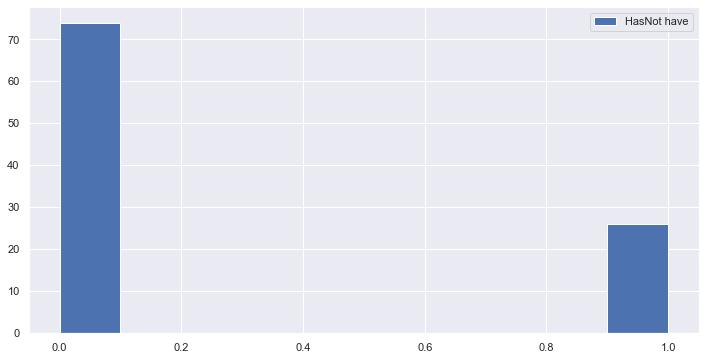

In [26]:
fig = pyplot.figure(figsize=(12,6))
pyplot.hist(df['Pain Classification'])
pyplot.legend(["Has" "Not have"])
pyplot.show()

<AxesSubplot:ylabel='Body Mass Index BMI'>

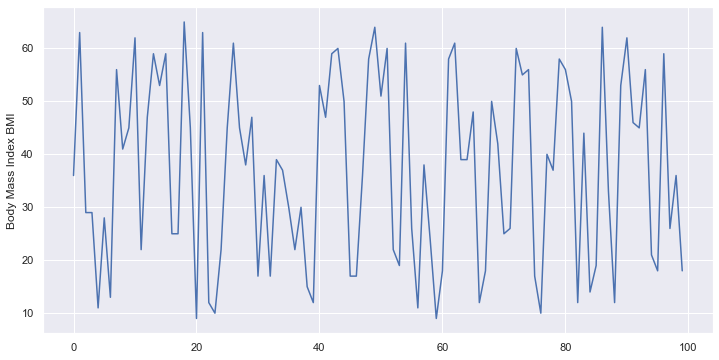

In [30]:
import seaborn as sns
fig = pyplot.figure(figsize=(12,6))
sns.lineplot(data=df['Body Mass Index BMI'])